# **1. Importing Modules**

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dropout, Dense
from tensorflow import lite

from sklearn.metrics import confusion_matrix, classification_report
import seaborn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

import numpy
import os
import pandas

# **2. Loading Dataset**

In [2]:
labels = ["still", "clockwise", "anticlockwise", "move"]

In [3]:
X = []
Y = []

for num, label in enumerate(labels):
    labeldata = numpy.load(os.path.join("samples", label + ".npy"))

    X.extend(labeldata)
    Y.extend([num] * len(labeldata))

X = numpy.array(X)
Y = numpy.array(Y)

In [4]:
print("Total Samples:", len(X))

Total Samples: 20000


In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.9, random_state=42
)

# **3. Building Model**

In [6]:
model = Sequential(
    [
        InputLayer(input_shape=X[0].shape),
        Dropout(0.2),
        Dense(24, activation="relu"),
        Dropout(0.5),
        Dense(10, activation="relu"),
        Dense(len(labels), activation="softmax"),
    ]
)

d:\Python Projects\Hand Gesture Classification\venv\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            44 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,086 (4.24 KB)

 Trainable params: 1,086 (4.24 KB)

 Non-trainable params: 0 (0.00 B)

# **4. Creating Callbacks**

In [8]:
dirpath = f"./models/{'-'.join(labels)}"

In [9]:
CPCallback = ModelCheckpoint(
    os.path.join(dirpath, "model.keras"), verbose=1, save_weights_only=False
)
ESCallback = EarlyStopping(patience=56, verbose=1)

# **5. Compiling Model**

In [10]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# **6. Training Model**

In [11]:
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[CPCallback, ESCallback],
)

Epoch 1/1000
138/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3237 - loss: 1.3596
Epoch 1: saving model to ./models/still-clockwise-anticlockwise-move\model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3244 - loss: 1.3588 - val_accuracy: 0.4225 - val_loss: 1.2478
Epoch 2/1000
133/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4328 - loss: 1.2134
Epoch 2: saving model to ./models/still-clockwise-anticlockwise-move\model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4390 - loss: 1.2103 - val_accuracy: 0.8245 - val_loss: 1.0190
Epoch 3/1000
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7149 - loss: 1.0017
Epoch 3: saving model to ./models/still-clockwise-anticlockwise-move\model.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7151 - loss: 1.0010 - val_accuracy: 0.9145 - val_loss: 0.7804
Epoch 4/1000
 95/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7696 - loss: 0.8135
Epoch 4: saving model to ./models/still-clockwise-anti

In [12]:
with open(os.path.join(dirpath, "labels.txt"), "w") as file:
    file.write("\n".join(labels))

# **7. Plotting Loss And Accuracy**

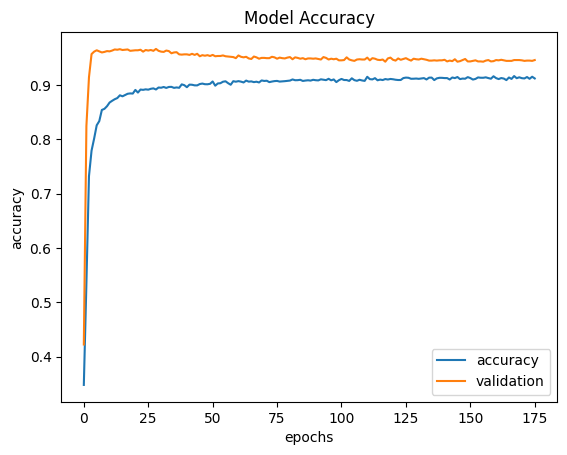

In [13]:
pyplot.title("Model Accuracy")

pyplot.plot(history.history["accuracy"])
pyplot.plot(history.history["val_accuracy"])

pyplot.legend(["accuracy", "validation"])

pyplot.xlabel("epochs")
pyplot.ylabel("accuracy")

pyplot.savefig(os.path.join(dirpath, "accuracy.png"), bbox_inches="tight")
pyplot.show()

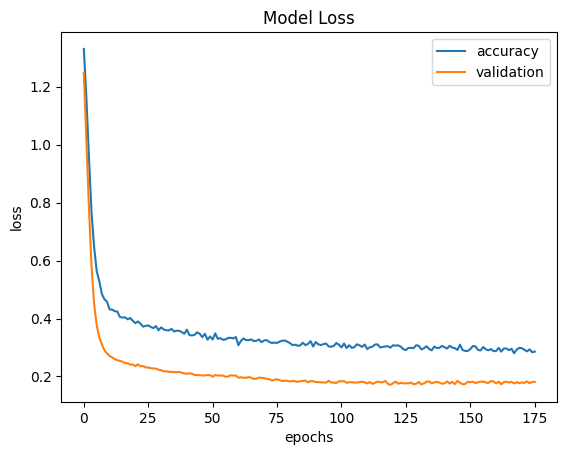

In [14]:
pyplot.title("Model Loss")

pyplot.plot(history.history["loss"])
pyplot.plot(history.history["val_loss"])

pyplot.legend(["accuracy", "validation"])

pyplot.xlabel("epochs")
pyplot.ylabel("loss")

pyplot.savefig(os.path.join(dirpath, "loss.png"), bbox_inches="tight")
pyplot.show()

# **8. Evaluation**

In [15]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9459 - loss: 0.1757 


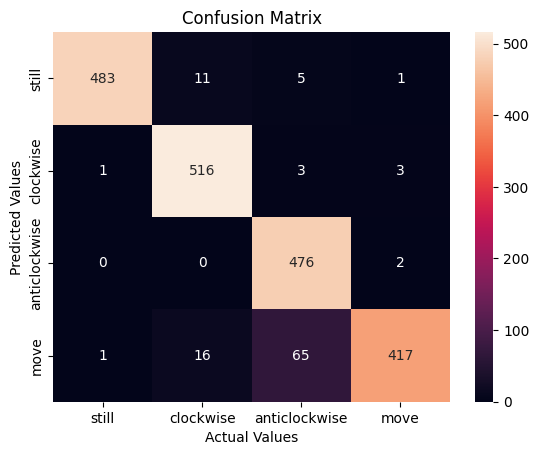

In [16]:
y_pred = numpy.argmax(model.predict(x_test, verbose=0), axis=1)

matrix = pandas.DataFrame(
    confusion_matrix(y_test, y_pred), index=labels, columns=labels
)

seaborn.heatmap(matrix, annot=True, fmt="g", square=False)

pyplot.title("Confusion Matrix")
pyplot.ylabel("Predicted Values")
pyplot.xlabel("Actual Values")

pyplot.savefig(os.path.join(dirpath, "confusion matrix.png"), bbox_inches="tight")
pyplot.show()

In [17]:
print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=labels))

Classification Report: 

               precision    recall  f1-score   support

        still       1.00      0.97      0.98       500
    clockwise       0.95      0.99      0.97       523
anticlockwise       0.87      1.00      0.93       478
         move       0.99      0.84      0.90       499

     accuracy                           0.95      2000
    macro avg       0.95      0.95      0.95      2000
 weighted avg       0.95      0.95      0.95      2000



# **9. Converting To TFLITE**

In [18]:
converter = lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open(os.path.join(dirpath, "model.tflite"), "wb") as file:
    file.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\udham\AppData\Local\Temp\tmp96ri5w5b\assets


INFO:tensorflow:Assets written to: C:\Users\udham\AppData\Local\Temp\tmp96ri5w5b\assets


Saved artifact at 'C:\Users\udham\AppData\Local\Temp\tmp96ri5w5b'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  1781484148992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1781484143888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1781484145648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1781484148112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1781484146352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1781484149520: TensorSpec(shape=(), dtype=tf.resource, name=None)


# **10. Inference**

In [19]:
interpreter = lite.Interpreter(model_path=os.path.join(dirpath, "model.tflite"))
interpreter.allocate_tensors()

In [20]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
num = numpy.random.randint(len(x_test))

In [22]:
interpreter.set_tensor(input_details[0]["index"], numpy.array([x_test[num]], "float32"))

In [23]:
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]["index"])

In [24]:
tflite_results = labels[numpy.argmax(tflite_results)]
reality = labels[y_test[num]]

print(f"Prediction: {tflite_results}\nReality: {reality}")

Prediction: still
Reality: still
